In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [3]:
month = date(2022, 10, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 10, 1), datetime.date(2022, 10, 31))

In [4]:
bom
eom

datetime.date(2022, 10, 1)

datetime.date(2022, 10, 31)

In [5]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)

df = pd.read_sql(sql, conn)
df


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-10-31" 
ORDER BY amount DESC



,date,amount,item,kind
0,2022-10-31,29000,Shelter,Shelter
1,2022-10-31,10000,Parent,Parent
2,2022-10-31,640,Internet Home,Communication
3,2022-10-31,420,Netflix,Edutainment
4,2022-10-31,320,Telephone Dtac,Communication
5,2022-10-31,170,Google,Edutainment
6,2022-10-31,100,Apple,Edutainment
7,2022-10-31,40,Apple,Edutainment


In [6]:
df.amount.sum()

40690

In [7]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)

df_eom = pd.read_sql(sql, conn)
df_eom


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-10-31" 
ORDER BY amount DESC



,date,amount,item,kind
0,2022-10-31,29000,Shelter,Shelter
1,2022-10-31,10000,Parent,Parent
2,2022-10-31,640,Internet Home,Communication
3,2022-10-31,420,Netflix,Edutainment
4,2022-10-31,320,Telephone Dtac,Communication
5,2022-10-31,170,Google,Edutainment
6,2022-10-31,100,Apple,Edutainment
7,2022-10-31,40,Apple,Edutainment


In [12]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)

df_t = pd.read_sql(sql, conn)
df_t.head()


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-10-01" AND "2022-10-31" 
ORDER BY date



,date,amount,item,kind
0,2022-10-03,200,Food,Food
1,2022-10-06,5000,Merit Making,Others
2,2022-10-06,4600,Pets,Pets
3,2022-10-08,3470,Mother,Parent
4,2022-10-08,200,Food,Food


In [13]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple                 140
Books & Software     1960
Food                 9210
Funeral              3000
Google                170
Internet Home         640
Merit Making         5100
Mother               5970
Netflix               420
Parent              10000
Pets                 4600
Shelter             29000
Telephone Dtac        320
Transportation        600
Name: amount, dtype: int64

In [14]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Communication       960
Edutainment        2690
Food               9210
Others             8100
Parent            15970
Pets               4600
Shelter           29000
Transportation      600
Name: amount, dtype: int64

In [15]:
expense = grouped.amount.sum()
sum(expense)

71130

<Figure size 864x864 with 0 Axes>

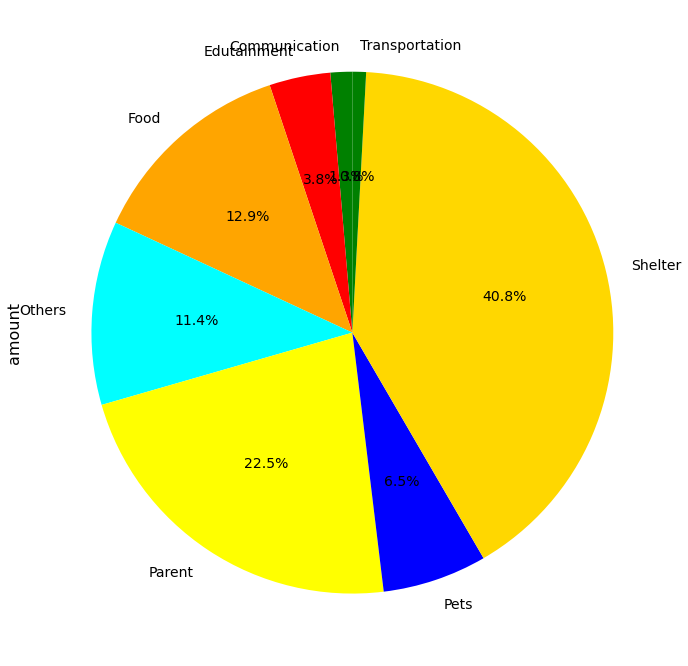

In [16]:
fig_path = "../fig/Expense-2210.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [17]:
expense.to_csv("../data/expense-2210.csv")

In [18]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-10-31" 
ORDER BY date



In [20]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

date,amount,item,kind


In [21]:
df_tmp.to_csv("../data/expense-eom.csv")